In [1]:
import torch
from torchvision import models
import torch.nn as nn

In [2]:
model = models.mobilenet_v3_large(weights=None)
num_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_features, 2)

model_path = 'model.pth'
model.load_state_dict(torch.load(model_path))
model.eval()

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [3]:
from torchvision import transforms
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

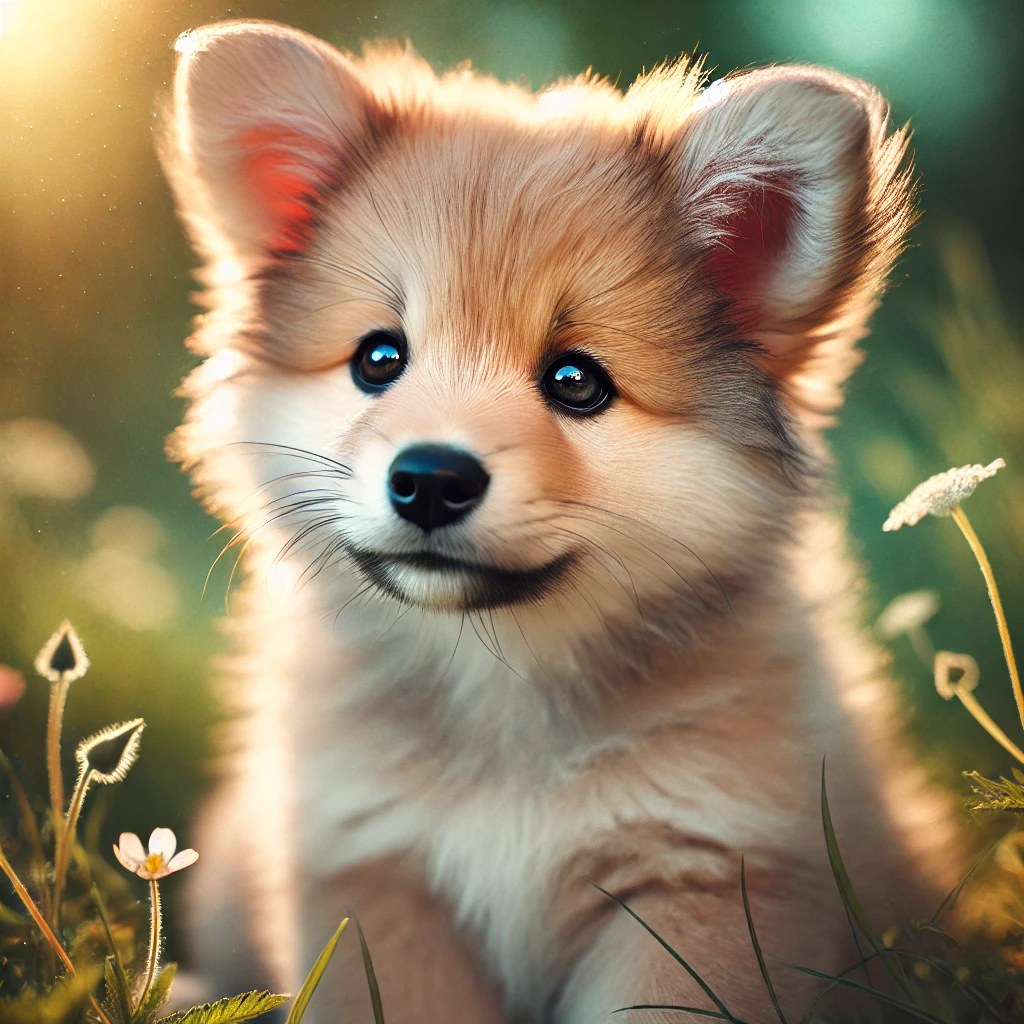

In [8]:
from PIL import Image
from IPython.display import display

image_path = 'dogB.png'
image = Image.open(image_path)
display(image)

In [9]:
image_tensor = transforms(image).unsqueeze(0)
with torch.no_grad():
    output = model(image_tensor)
    _, predicted = torch.max(output, 1)

classes = ['Cat', 'Dog']
print(f"{classes[predicted.item()]}")

Dog
